In [1]:
#!pip install sentence-transformers pandas scikit-learn


In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
# Load the dataset
dataset_path = 'DataNeuron_Text_Similarity.csv'
data = pd.read_csv(dataset_path)

In [19]:
data.head()

,text1,text2,similarity_score
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,75.485306
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,72.851326
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,65.089745
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,60.944443
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,78.611717


In [4]:
# Load a pre-trained BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text1             3000 non-null   object 
 1   text2             3000 non-null   object 
 2   similarity_score  3000 non-null   float32
dtypes: float32(1), object(2)
memory usage: 58.7+ KB


In [5]:
# Get sentence embeddings
embeddings1 = model.encode(data['text1'].values, convert_to_tensor=True)
embeddings2 = model.encode(data['text2'].values, convert_to_tensor=True)

In [6]:
# Calculate cosine similarity between embeddings
cosine_sim = (embeddings1 * embeddings2).sum(dim=1)

In [7]:
# Normalize cosine similarity to be between 0 and 1
normalized_similarity = (cosine_sim + 1) / 2

In [21]:
data['similarity_score'] = normalized_similarity.numpy()

In [24]:
# Train a Linear Regression model
X_train, X_valid, y_train, y_valid = train_test_split(normalized_similarity.numpy(), data['similarity_score'], test_size=0.2, random_state=42)



In [25]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [26]:
# Evaluate the model
predictions = regressor.predict(X_valid.reshape(-1, 1))
mse = mean_squared_error(y_valid, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0


In [27]:
# Save the model
joblib.dump(regressor, 'sts_model.joblib')

['sts_model.joblib']

In [29]:
result_df = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions})
print(result_df.head())

         Actual  Predicted
1801  89.000237  89.000237
1190  72.232689  72.232689
1817  75.670135  75.670135
251   87.805626  87.805626
2505  81.885254  81.885254


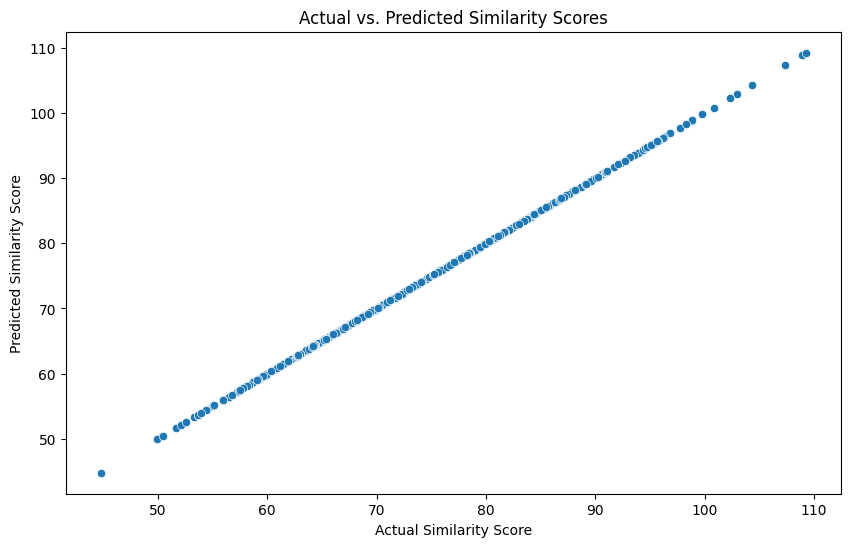

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=result_df)
plt.title('Actual vs. Predicted Similarity Scores')
plt.xlabel('Actual Similarity Score')
plt.ylabel('Predicted Similarity Score')
plt.show()
